# 🖼️ Image Classification with CIFAR-10

## 📌 Project Overview
This project focuses on building a deep learning model to classify images from the **CIFAR-10 dataset**, which consists of **60,000 32x32 color images** divided into **10 different classes** (airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).  
The goal is to train a model that can accurately predict the class of unseen images.

---

## 🎯 Objectives
- Develop a **Convolutional Neural Network (CNN)** for image classification.
- Apply **data augmentation** techniques to improve generalization.
- Use **regularization methods** like Dropout and Batch Normalization.
- Evaluate the model using accuracy, confusion matrix, and classification report.

---

## 📂 Dataset
- **Dataset Name:** CIFAR-10  
- **Size:** 60,000 images (50,000 for training, 10,000 for testing).  
- **Image Shape:** 32x32 pixels, RGB color.  
- **Classes (10):**  
  1. Airplane ✈️  
  2. Automobile 🚗  
  3. Bird 🐦  
  4. Cat 🐱  
  5. Deer 🦌  
  6. Dog 🐶  
  7. Frog 🐸  
  8. Horse 🐴  
  9. Ship 🚢  
  10. Truck 🚚  

---

## 🛠️ What You Will Learn
- Fundamentals of **Convolutional Neural Networks (CNNs)**.
- Importance of **Pooling layers** (MaxPooling, AveragePooling).
- Techniques for **regularization**:
  - Dropout to reduce overfitting.  
  - Batch Normalization for stable training.  
- **Data Augmentation** (rotation, flipping, shifting, zooming) to make the model more robust.

---

## ⚙️ Tools & Libraries
- **Python** 🐍  
- **TensorFlow / Keras** or **PyTorch**  
- **Matplotlib & Seaborn** for visualization  
- **NumPy & Pandas** for data handling  

---

## ✅ Expected Outcomes
- A trained CNN model that achieves **70–80% accuracy** on CIFAR-10.  
- Insights into how different layers and hyperparameters affect performance.  
- Understanding of how to build scalable image classification pipelines.  

In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



In [2]:
from tensorflow.keras.datasets import cifar10

# Load MNIST dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

C:\Users\shahd\AppData\Local\Temp\ipykernel_5280\2763970081.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(Y_train[i])])


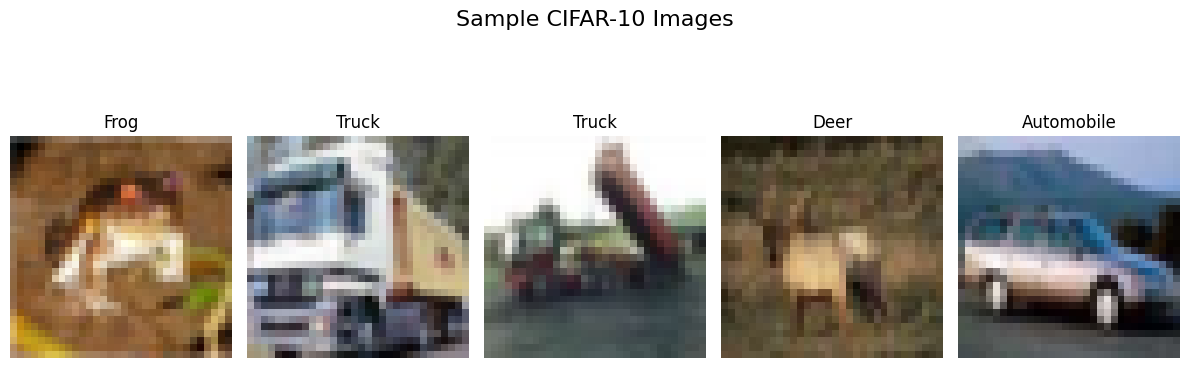

In [5]:
## displaying some of the images 
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Show first 5 images with labels
num_images = 5
plt.figure(figsize=(12, 4))

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(Y_train[i])])
    plt.axis("off")

plt.suptitle("Sample CIFAR-10 Images", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()
    


In [6]:
## normalization of the dataset 
X_train=X_train/255
X_test=X_test/255 


In [7]:
## we will convert the classes using one-hot encoding 
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train , num_classes=10)
Y_test=to_categorical(Y_test , num_classes=10)
Y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [10]:
## building the model 

model = keras.Sequential(
    [keras.layers.Flatten(input_shape=(32,32,3)), ## the layer the flatten the images 
    keras.layers.Dense(3000 , activation='relu') ,## the input layer after the image has been flattened
    keras.layers.Dense(1000 , activation='relu') , ## this is the hidden layer 
    keras.layers.Dense(10,activation='sigmoid')] ## the output layer 
)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    
    
)

model.fit(X_train ,Y_train , epochs=50)



Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - accuracy: 0.3264 - loss: 1.8866
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.4020 - loss: 1.6614
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4373 - loss: 1.5721
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4550 - loss: 1.5226
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4655 - loss: 1.4866
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.4807 - loss: 1.4502
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 60ms/step - accuracy: 0.4919 - loss: 1.4194
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.5007 - loss: 1.3950
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.5100 - loss: 1.3713
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.5198 - loss: 1.3476
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 59ms/step - accuracy: 0.5199 - loss: 1.3363
Epoch

In [11]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4893 - loss: 1.8563


[1.8562716245651245, 0.489300012588501]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


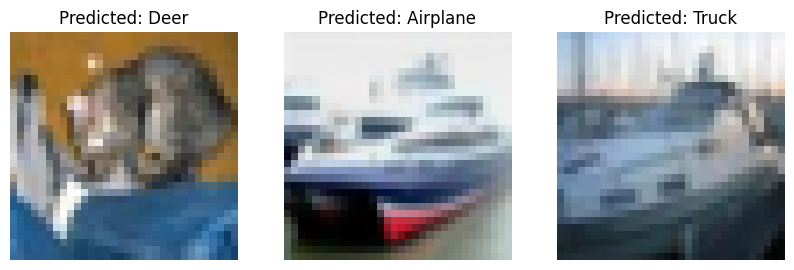

In [16]:
pred = model.predict(X_test[:3])

fig, axes = plt.subplots(1, 3, figsize=(10, 4))  

for i in range(3):
    axes[i].imshow(X_test[i], cmap="gray")  
    axes[i].set_title(f"Predicted: {class_names[np.argmax(pred[i])]}")
    axes[i].axis("off")  

plt.show()